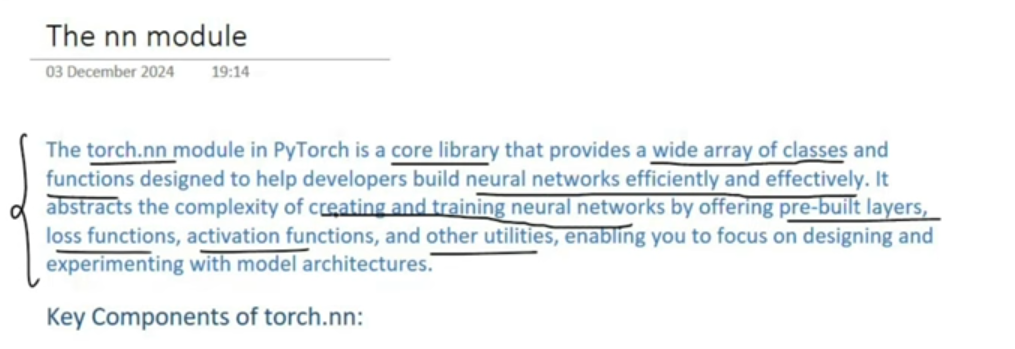

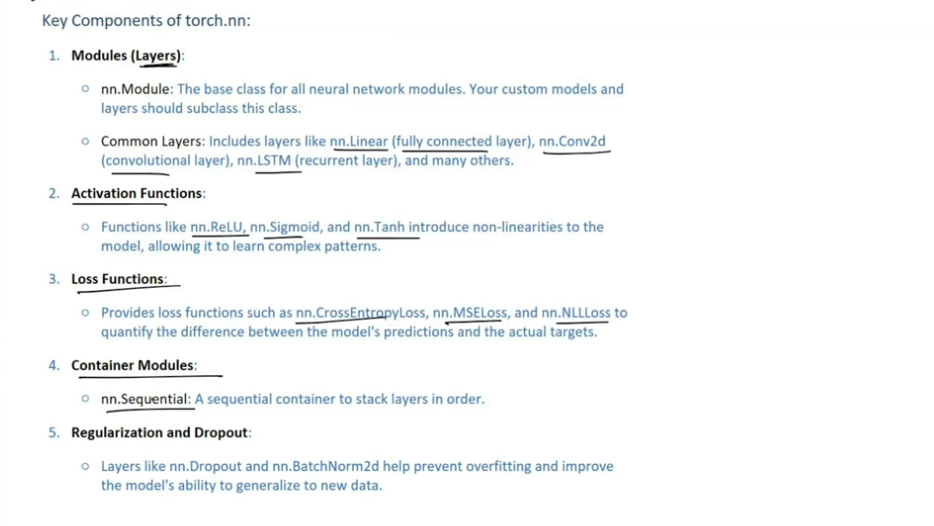

In [5]:
import torch
import torch.nn as nn

In [10]:
# creating a class inheriting the nn.MODULE class

class Model(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.linear1= nn.Linear(num_features,5)
    self.relu = nn.ReLU()
    self.linear2 =nn.Linear(5,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    x= self.linear1(x)
    x= self.relu(x)
    x= self.linear2(x)
    x= self.sigmoid(x)
    return x


In [11]:
x= torch.rand(10)
model = Model(num_features=10)
model(x)                       # the direct calling of object as a function triggers the forward function (modified using magic functions)

tensor([0.5912], grad_fn=<SigmoidBackward0>)

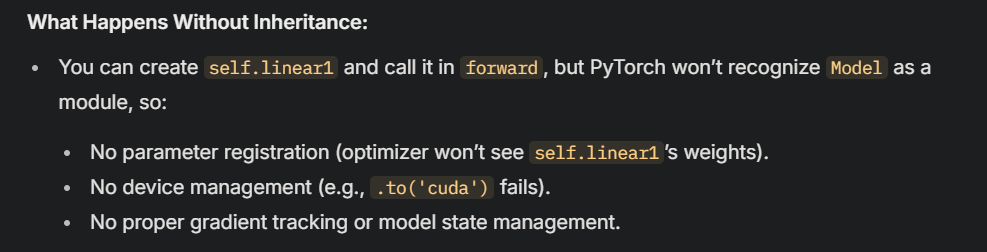

## WE CAN USE SEQUENTIAL INPLACE OF MULTIPLE LAYERS TO EASE THE FORWARD PASS BY ONLY USING SEQUENTIAL

In [31]:
class Model(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.network = nn.Sequential(nn.Linear(num_features,5),
    nn.ReLU(),
    nn.Linear(5,1),
    nn.Sigmoid())

  def forward(self,x):
    x= self.network(x)
    return x
  def loss_func(self,y_pred,y):
    loss_func = nn.BCELoss()
    return loss_func(y_pred,y)

In [32]:
x= torch.rand(10,10)
model = Model(num_features=10)
y_pred=model(x) # # the direct calling of object as a function triggers the forward function (modified using magic functions)
y_pred

tensor([[0.5764],
        [0.5734],
        [0.5876],
        [0.5640],
        [0.5752],
        [0.5743],
        [0.5628],
        [0.5964],
        [0.5784],
        [0.5624]], grad_fn=<SigmoidBackward0>)

In [33]:
y = torch.randint(0,2,size=y_pred.shape,dtype=torch.float32)

In [34]:
y

tensor([[1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.]])

In [35]:

loss= model.loss_func(y_pred,y)

In [36]:
loss

tensor(0.7001, grad_fn=<BinaryCrossEntropyBackward0>)

### OPTIM MODULE , IT ACCESS THE PARAMETERS(THE INHERITANCE ALLOWS TO ACCESS MODEL PARAMETERS) AND RUNS AN ALGO SUCH AS SGD with learning parameters

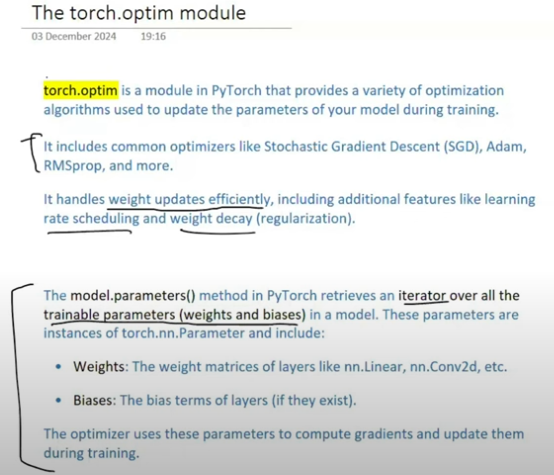

In [37]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [38]:
# clear gradient
optimizer.zero_grad()
# backtrack loss function
loss.backward()
# update parameter
optimizer.step()

### CLUBBING ALL LEARNINGS TOGETHER

In [74]:
class Model (nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.network = nn.Sequential(
        nn.Linear(num_features,8),
        nn.ReLU(),
        nn.Linear(8,6),
        nn.ReLU(),
        nn.Linear(6,5),
        nn.ReLU(),
        nn.Linear(5,4),
        nn.Sigmoid()
    )
  def forward(self,x):
    x = self.network(x)
    return x
  def loss(self,y_pred,y):
    loss_func = nn.BCELoss()
    return loss_func(y_pred,y)

In [75]:
x= torch.rand(100,16)
y = torch.randint(0,2,(100,4),dtype=torch.float32)
model = Model(x.shape[1])
optimizer = torch.optim.RMSprop(model.parameters())

In [76]:
for epoch in range(1,100):
  y_pred = model(x)        # the inheritence allows the obj to be used as a function with parameter x which runs forward pass
  loss = model.loss(y_pred,y) # compute loss
  optimizer.zero_grad()       # set gradient to 0
  loss.backward()             # backpropagate
  optimizer.step()            # update weights
  print(f"loss at epoch:{epoch} is {loss}")

loss at epoch:1 is 0.6814687848091125
loss at epoch:2 is 0.681611955165863
loss at epoch:3 is 0.6834883093833923
loss at epoch:4 is 0.6795725226402283
loss at epoch:5 is 0.679271399974823
loss at epoch:6 is 0.6791340708732605
loss at epoch:7 is 0.6790335774421692
loss at epoch:8 is 0.6789405345916748
loss at epoch:9 is 0.6788414716720581
loss at epoch:10 is 0.6787265539169312
loss at epoch:11 is 0.6785874366760254
loss at epoch:12 is 0.678414523601532
loss at epoch:13 is 0.6781966686248779
loss at epoch:14 is 0.6779180765151978
loss at epoch:15 is 0.677553117275238
loss at epoch:16 is 0.677063524723053
loss at epoch:17 is 0.6763981580734253
loss at epoch:18 is 0.6754826903343201
loss at epoch:19 is 0.6747624278068542
loss at epoch:20 is 0.6787487864494324
loss at epoch:21 is 0.6804720163345337
loss at epoch:22 is 0.6800436973571777
loss at epoch:23 is 0.6746317148208618
loss at epoch:24 is 0.6732469797134399
loss at epoch:25 is 0.6723936200141907
loss at epoch:26 is 0.671262264251709
l